# Exploratory Data Analysis (EDA)

The dataset would be review after manually data labelling.

## Data Analysis and Cleaning

The libraries are needed to be imported. 

In [60]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from collections import Counter 



In [61]:
df = pd.read_excel('../../data/processed/labelled_processed_data.xlsx')
df


,text,entity,sentiment,konu,severity,bilet,musteri_hizmetleri,odeme,uygulama,passolig,passolig kart,diger,aksiyon
0,passo uzerinden bir konsere guzel bir miktarda...,Passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,1,1
1,passo cesme acikhava gosteri bileti bkm in gos...,Passo,olumsuz,diger,1,1,0,0,0,0,0,1,1
2,eylul anyma etkinligi icin biletler ciktiktan ...,Passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
3,passo dan aldigim eylul tan tasci konser bilet...,Passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
4,passo bilet aldim email mesaj olarak bilgi gel...,Passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,musteri hizmetleri islemlerim passo sayesinde ...,Passo,olumlu,cagri merkezi yetkinlik,0,0,1,0,0,0,0,0,0
3180,passolig kartimla uygulama islemi inanilmaz de...,Passo; Passolig; Passolig Kart,olumlu,uygulama,0,0,0,0,1,1,1,0,0
3181,uygulama islemlerim sirasinda musteri hizmetle...,Passolig,notr,uygulama,0,0,1,0,1,0,0,0,0
3182,passolig kartimla sorunsuzca ilgili passolig k...,Passo; Passolig; Passolig Kart,notr,diger,0,0,0,0,0,1,1,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                3184 non-null   object
 1   entity              3184 non-null   object
 2   sentiment           3184 non-null   object
 3   konu                3184 non-null   object
 4   severity            3184 non-null   int64 
 5   bilet               3184 non-null   int64 
 6   musteri_hizmetleri  3184 non-null   int64 
 7   odeme               3184 non-null   int64 
 8   uygulama            3184 non-null   int64 
 9   passolig            3184 non-null   int64 
 10  passolig kart       3184 non-null   int64 
 11  diger               3184 non-null   int64 
 12  aksiyon             3184 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 323.5+ KB


In [63]:
entity = df['entity'].unique()
entity

array(['Passo', 'Passo; Passolig', 'Passolig', 'Passolig; Passo',
       'Passolig; Passolig Kart', 'Passolig Kart', 'Passolig Kart; Passo',
       'Passo; Passolig; Passolig Kart', 'Passo; Passolig Kart',
       'Passo; Passolig Kart; Passolig', 'Passolig Kart; Passo; Passolig',
       'Passolig; Passo; Passolig Kart', 'Passolig Kart; Passolig; Passo',
       'Passolig; Passolig Kart; Passo', 'Passolig Kart; Passolig',
       'Passolig kart', 'Passolig; Passolig; Passolig Kart', 'Passolig '],
      dtype=object)

In [64]:
unique_values = df['sentiment'].unique()
unique_values

array(['olumsuz', 'notr', 'olumlu'], dtype=object)

In [65]:
severity = df['severity'].unique()
severity

array([1, 2, 0], dtype=int64)

In [66]:
reason = df['konu'].unique()
reason

array(['cagri merkezi yetkinlik', 'diger', 'genel', 'odeme', 'uygulama',
       'iptal', 'degisiklik', 'uyelik', 'iade', 'transfer', 'fatura'],
      dtype=object)

In [67]:
bilet = df['bilet'].unique()
bilet

array([0, 1], dtype=int64)

In [68]:
musteri_hizmetleri = df['musteri_hizmetleri'].unique()
musteri_hizmetleri

array([1, 0], dtype=int64)

In [69]:
odeme = df['odeme'].unique()
odeme

array([0, 1], dtype=int64)

In [70]:
uygulama = df['uygulama'].unique()
uygulama

array([0, 1], dtype=int64)

In [71]:
passolig = df['passolig'].unique()
passolig

array([0, 1], dtype=int64)

In [72]:
passolig_kart = df['passolig kart'].unique()
passolig_kart

array([0, 1], dtype=int64)

In [73]:
diger = df['diger'].unique()
diger

array([1, 0], dtype=int64)

In [74]:
aksiyon = df['aksiyon'].unique()
aksiyon

array([1, 0], dtype=int64)

In [75]:
for column in df.columns:
    if column not in ['text', 'entity']:
        # Sütundaki eşsiz değerlerin frekanslarını hesapla
        grouped_df = df.groupby(column).size().reset_index(name='Count')
        # Sonuçları sıralayıp yazdır
        sorted_grouped_df = grouped_df.sort_values(by='Count', ascending=False)
        
        # Her sütun için ayrı bir hücrede göster
        display(sorted_grouped_df)


,sentiment,Count
2,olumsuz,2610
0,notr,446
1,olumlu,128


,konu,Count
4,genel,597
2,diger,579
10,uygulama,544
9,uyelik,416
7,odeme,311
0,cagri merkezi yetkinlik,297
5,iade,224
6,iptal,159
8,transfer,45
1,degisiklik,11


,severity,Count
2,2,1513
1,1,1059
0,0,612


,bilet,Count
0,0,1866
1,1,1318


,musteri_hizmetleri,Count
0,0,2322
1,1,862


,odeme,Count
0,0,2543
1,1,641


,uygulama,Count
0,0,1608
1,1,1576


,passolig,Count
1,1,1620
0,0,1564


,passolig kart,Count
0,0,2306
1,1,878


,diger,Count
0,0,2621
1,1,563


,aksiyon,Count
1,1,2566
0,0,618


## Entity List Data Processing


In [76]:
df['entity'] = df['entity'].str.strip()

# Boşlukları tek bir boşluğa indirmek için replace fonksiyonunu kullanın
df['entity'] = df['entity'].str.replace('\s+', ' ', regex=True)

In [77]:
df['entity'] = df['entity'].str.lower()
df

,text,entity,sentiment,konu,severity,bilet,musteri_hizmetleri,odeme,uygulama,passolig,passolig kart,diger,aksiyon
0,passo uzerinden bir konsere guzel bir miktarda...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,1,1
1,passo cesme acikhava gosteri bileti bkm in gos...,passo,olumsuz,diger,1,1,0,0,0,0,0,1,1
2,eylul anyma etkinligi icin biletler ciktiktan ...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
3,passo dan aldigim eylul tan tasci konser bilet...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
4,passo bilet aldim email mesaj olarak bilgi gel...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,musteri hizmetleri islemlerim passo sayesinde ...,passo,olumlu,cagri merkezi yetkinlik,0,0,1,0,0,0,0,0,0
3180,passolig kartimla uygulama islemi inanilmaz de...,passo; passolig; passolig kart,olumlu,uygulama,0,0,0,0,1,1,1,0,0
3181,uygulama islemlerim sirasinda musteri hizmetle...,passolig,notr,uygulama,0,0,1,0,1,0,0,0,0
3182,passolig kartimla sorunsuzca ilgili passolig k...,passo; passolig; passolig kart,notr,diger,0,0,0,0,0,1,1,0,0


In [78]:
df['entity_list_split'] = df['entity'].str.split(";")

# Tüm entity'leri bir listeye toplama ve boşlukları temizleme
all_entities = [entity.strip() for sublist in df['entity_list_split'].tolist() for entity in sublist]

# Benzersiz entity'leri set ile ayırma
unique_entities = set(all_entities)

# Benzersiz entity'leri bir DataFrame'e dönüştürme
unique_entities_df = pd.DataFrame(unique_entities, columns=['entity'])

print(unique_entities_df)

          entity
0          passo
1       passolig
2  passolig kart


In [79]:

entity_counts = pd.Series(all_entities).value_counts()
top_entities_df = entity_counts.reset_index()
top_entities_df.columns = ['entity', 'count']

# Bar grafiği oluşturma
fig = px.bar(
    top_entities_df,
    x='entity',
    y='count',
    title='Most Frequent Entities',
    labels={'entity': 'Entity', 'count': 'Count'},
    color='count',  # Renkleri count'a göre ayarla
    color_continuous_scale='Viridis',  # Renk paleti
    text='count',  # Barların üzerine değerleri yazdır
    template='plotly_white',  # Grafiğin arka planı
    width=1064,  # Grafik genişliği
    height=600   # Grafik yüksekliği
)

# Barların üzerindeki metinleri hizala
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# X eksenindeki etiketleri döndür ve Y eksenini otomatik ayarla
fig.update_xaxes(tickangle=45)
fig.update_yaxes(automargin=True)

# Grafiği göster
fig.show()


In [80]:
df.drop(axis = 1, columns='entity_list_split', inplace = True)
df

,text,entity,sentiment,konu,severity,bilet,musteri_hizmetleri,odeme,uygulama,passolig,passolig kart,diger,aksiyon
0,passo uzerinden bir konsere guzel bir miktarda...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,1,1
1,passo cesme acikhava gosteri bileti bkm in gos...,passo,olumsuz,diger,1,1,0,0,0,0,0,1,1
2,eylul anyma etkinligi icin biletler ciktiktan ...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
3,passo dan aldigim eylul tan tasci konser bilet...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1
4,passo bilet aldim email mesaj olarak bilgi gel...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,musteri hizmetleri islemlerim passo sayesinde ...,passo,olumlu,cagri merkezi yetkinlik,0,0,1,0,0,0,0,0,0
3180,passolig kartimla uygulama islemi inanilmaz de...,passo; passolig; passolig kart,olumlu,uygulama,0,0,0,0,1,1,1,0,0
3181,uygulama islemlerim sirasinda musteri hizmetle...,passolig,notr,uygulama,0,0,1,0,1,0,0,0,0
3182,passolig kartimla sorunsuzca ilgili passolig k...,passo; passolig; passolig kart,notr,diger,0,0,0,0,0,1,1,0,0


In [81]:
from itertools import combinations

# Tekil sütunlar için label atamaları
single_column_labels = {
    'bilet': 1,
    'musteri_hizmetleri': 2,
    'odeme': 3,
    'uygulama': 4,
    'passolig': 5,
    'passolig kart': 6,
    'diger': 7
}

# İkili sütun kombinasyonları için label atamaları
pair_column_labels = {
    ('bilet', 'musteri_hizmetleri'): 8,
    ('bilet', 'odeme'): 9,
    ('bilet', 'uygulama'): 10,
    ('bilet', 'passolig'): 11,
    ('bilet', 'passolig kart'): 12,
    ('bilet', 'diger'): 13,
    ('musteri_hizmetleri', 'odeme'): 14,
    ('musteri_hizmetleri', 'uygulama'): 15,
    ('musteri_hizmetleri', 'passolig'): 16,
    ('musteri_hizmetleri', 'passolig kart'): 17,
    ('musteri_hizmetleri', 'diger'): 18,
    ('odeme', 'uygulama'): 19,
    ('odeme', 'passolig'): 20,
    ('odeme', 'passolig kart'): 21,
    ('odeme', 'diger'): 22,
    ('uygulama', 'passolig'): 23,
    ('uygulama', 'passolig kart'): 24,
    ('uygulama', 'diger'): 25,
    ('passolig', 'passolig kart'): 26,
    ('passolig', 'diger'): 27,
    ('passolig kart', 'diger'): 28
}

# Üçlü sütun kombinasyonları için label atamaları
trio_column_labels = {
    ('bilet', 'musteri_hizmetleri', 'odeme'): 29,
    ('bilet', 'musteri_hizmetleri', 'uygulama'): 30,
    ('bilet', 'musteri_hizmetleri', 'passolig'): 31,
    ('bilet', 'musteri_hizmetleri', 'passolig kart'): 32,
    ('bilet', 'musteri_hizmetleri', 'diger'): 33,
    ('bilet', 'odeme', 'uygulama'): 34,
    ('bilet', 'odeme', 'passolig'): 35,
    ('bilet', 'odeme', 'passolig kart'): 36,
    ('bilet', 'odeme', 'diger'): 37,
    ('bilet', 'uygulama', 'passolig'): 38,
    ('bilet', 'uygulama', 'passolig kart'): 39,
    ('bilet', 'uygulama', 'diger'): 40,
    ('bilet', 'passolig', 'passolig kart'): 41,
    ('bilet', 'passolig', 'diger'): 42,
    ('bilet', 'passolig kart', 'diger'): 43,
    ('musteri_hizmetleri', 'odeme', 'uygulama'): 44,
    ('musteri_hizmetleri', 'odeme', 'passolig'): 45,
    ('musteri_hizmetleri', 'odeme', 'passolig kart'): 46,
    ('musteri_hizmetleri', 'odeme', 'diger'): 47,
    ('musteri_hizmetleri', 'uygulama', 'passolig'): 48,
    ('musteri_hizmetleri', 'uygulama', 'passolig kart'): 49,
    ('musteri_hizmetleri', 'uygulama', 'diger'): 50,
    ('musteri_hizmetleri', 'passolig', 'passolig kart'): 51,
    ('musteri_hizmetleri', 'passolig', 'diger'): 52,
    ('musteri_hizmetleri', 'passolig kart', 'diger'): 53,
    ('odeme', 'uygulama', 'passolig'): 54,
    ('odeme', 'uygulama', 'passolig kart'): 55,
    ('odeme', 'uygulama', 'diger'): 56,
    ('odeme', 'passolig', 'passolig kart'): 57,
    ('odeme', 'passolig', 'diger'): 58,
    ('odeme', 'passolig kart', 'diger'): 59,
    ('uygulama', 'passolig', 'passolig kart'): 60,
    ('uygulama', 'passolig', 'diger'): 61,
    ('uygulama', 'passolig kart', 'diger'): 62,
    ('passolig', 'passolig kart', 'diger'): 63
}

# Dörtlü sütun kombinasyonları için label atamaları
four_column_labels = {
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama'): 64,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig'): 65,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig kart'): 66,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'diger'): 67,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig'): 68,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig kart'): 69,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'diger'): 70,
    ('bilet', 'musteri_hizmetleri', 'passolig', 'passolig kart'): 71,
    ('bilet', 'musteri_hizmetleri', 'passolig', 'diger'): 72,
    ('bilet', 'musteri_hizmetleri', 'passolig kart', 'diger'): 73,
    ('bilet', 'odeme', 'uygulama', 'passolig'): 74,
    ('bilet', 'odeme', 'uygulama', 'passolig kart'): 75,
    ('bilet', 'odeme', 'uygulama', 'diger'): 76,
    ('bilet', 'odeme', 'passolig', 'passolig kart'): 77,
    ('bilet', 'odeme', 'passolig', 'diger'): 78,
    ('bilet', 'odeme', 'passolig kart', 'diger'): 79,
    ('bilet', 'uygulama', 'passolig', 'passolig kart'): 80,
    ('bilet', 'uygulama', 'passolig', 'diger'): 81,
    ('bilet', 'uygulama', 'passolig kart', 'diger'): 82,
    ('bilet', 'passolig', 'passolig kart', 'diger'): 83,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig'): 84,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig kart'): 85,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'diger'): 86,
    ('musteri_hizmetleri', 'odeme', 'passolig', 'passolig kart'): 87,
    ('musteri_hizmetleri', 'odeme', 'passolig', 'diger'): 88,
    ('musteri_hizmetleri', 'odeme', 'passolig kart', 'diger'): 89,
    ('musteri_hizmetleri', 'uygulama', 'passolig', 'passolig kart'): 90,
    ('musteri_hizmetleri', 'uygulama', 'passolig', 'diger'): 91,
    ('musteri_hizmetleri', 'uygulama', 'passolig kart', 'diger'): 92,
    ('musteri_hizmetleri', 'passolig', 'passolig kart', 'diger'): 93,
    ('odeme', 'uygulama', 'passolig', 'passolig kart'): 94,
    ('odeme', 'uygulama', 'passolig', 'diger'): 95,
    ('odeme', 'uygulama', 'passolig kart', 'diger'): 96,
    ('odeme', 'passolig', 'passolig kart', 'diger'): 97,
    ('uygulama', 'passolig', 'passolig kart', 'diger'): 98
}

# Beşli sütun kombinasyonları için label atamaları
five_column_labels = {
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig'): 99,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig kart'): 100,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'diger'): 101,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig', 'passolig kart'): 102,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig', 'diger'): 103,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig kart', 'diger'): 104,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig', 'passolig kart'): 105,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig', 'diger'): 106,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig kart', 'diger'): 107,
    ('bilet', 'musteri_hizmetleri', 'passolig', 'passolig kart', 'diger'): 108,
    ('bilet', 'odeme', 'uygulama', 'passolig', 'passolig kart'): 109,
    ('bilet', 'odeme', 'uygulama', 'passolig', 'diger'): 110,
    ('bilet', 'odeme', 'uygulama', 'passolig kart', 'diger'): 111,
    ('bilet', 'odeme', 'passolig', 'passolig kart', 'diger'): 112,
    ('bilet', 'uygulama', 'passolig', 'passolig kart', 'diger'): 113,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart'): 114,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'diger'): 115,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig kart', 'diger'): 116,
    ('musteri_hizmetleri', 'odeme', 'passolig', 'passolig kart', 'diger'): 117,
    ('musteri_hizmetleri', 'uygulama', 'passolig', 'passolig kart', 'diger'): 118,
    ('odeme', 'uygulama', 'passolig', 'passolig kart', 'diger'): 119
}

# Altılı sütun kombinasyonları için label atamaları
six_column_labels = {
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart'): 120,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'diger'): 121,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig kart', 'diger'): 122,
    ('bilet', 'musteri_hizmetleri', 'odeme', 'passolig', 'passolig kart', 'diger'): 123,
    ('bilet', 'musteri_hizmetleri', 'uygulama', 'passolig', 'passolig kart', 'diger'): 124,
    ('bilet', 'odeme', 'uygulama', 'passolig', 'passolig kart', 'diger'): 125,
    ('musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart', 'diger'): 126
}

seven_column_labels = {
    ('bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart', 'diger'): 127
}


def classify(row):
    active_columns = [col for col in columns if row[col] == 1]
    
    # Tekil sütunlar için label atama
    if len(active_columns) == 1:
        return single_column_labels.get(active_columns[0], -1)
    
    # İkili sütun kombinasyonları için label atama
    elif len(active_columns) == 2:
        combination = tuple(active_columns)
        reverse_combination = tuple(reversed(active_columns))
        
        # Hem orijinal sırayla hem de ters sırayla sözlükte arama yapar
        if combination in pair_column_labels:
            return pair_column_labels[combination]
        elif reverse_combination in pair_column_labels:
            return pair_column_labels[reverse_combination]
        else:
            return -1
    
    # Üçlü sütun kombinasyonları için label atama
    elif len(active_columns) == 3:
        combination = tuple(active_columns)
        sorted_combination = tuple(sorted(active_columns))
        
        # Hem orijinal sırayla hem de sıralı şekilde kontrol eder
        if combination in trio_column_labels:
            return trio_column_labels[combination]
        elif sorted_combination in trio_column_labels:
            return trio_column_labels[sorted_combination]
        else:
            return -1
    
    # Dörtlü sütun kombinasyonları için label atama
    elif len(active_columns) == 4:
        combination = tuple(active_columns)
        sorted_combination = tuple(sorted(active_columns))
        
        # Hem orijinal sırayla hem de sıralı şekilde kontrol eder
        if combination in four_column_labels:
            return four_column_labels[combination]
        elif sorted_combination in four_column_labels:
            return four_column_labels[sorted_combination]
        else:
            return -1
    
    # Beşli sütun kombinasyonları için label atama
    elif len(active_columns) == 5:
        combination = tuple(active_columns)
        sorted_combination = tuple(sorted(active_columns))
        
        # Hem orijinal sırayla hem de sıralı şekilde kontrol eder
        if combination in five_column_labels:
            return five_column_labels[combination]
        elif sorted_combination in five_column_labels:
            return five_column_labels[sorted_combination]
        else:
            return -1
    
    # Altılı sütun kombinasyonları için label atama
    elif len(active_columns) == 6:
        combination = tuple(active_columns)
        sorted_combination = tuple(sorted(active_columns))
        
        # Hem orijinal sırayla hem de sıralı şekilde kontrol eder
        if combination in six_column_labels:
            return six_column_labels[combination]
        elif sorted_combination in six_column_labels:
            return six_column_labels[sorted_combination]
        else:
            return -1
    
    elif len(active_columns) == 7:
        combination = tuple(active_columns)
        sorted_combination = tuple(sorted(active_columns))
        
        # Hem orijinal sırayla hem de sıralı şekilde kontrol eder
        if combination in seven_column_labels:
            return seven_column_labels[combination]
        elif sorted_combination in seven_column_labels:
            return seven_column_labels[sorted_combination]
        else:
            return -1
    
    # Diğer durumlarda -1 döner
    return -1
# Sütunlar
columns = ['bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart', 'diger']

# DataFrame'e 'label' sütunu ekleyin
df['label'] = df.apply(classify, axis=1)

df


,text,entity,sentiment,konu,severity,bilet,musteri_hizmetleri,odeme,uygulama,passolig,passolig kart,diger,aksiyon,label
0,passo uzerinden bir konsere guzel bir miktarda...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,1,1,18
1,passo cesme acikhava gosteri bileti bkm in gos...,passo,olumsuz,diger,1,1,0,0,0,0,0,1,1,13
2,eylul anyma etkinligi icin biletler ciktiktan ...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1,8
3,passo dan aldigim eylul tan tasci konser bilet...,passo,olumsuz,cagri merkezi yetkinlik,1,1,1,0,0,0,0,0,1,8
4,passo bilet aldim email mesaj olarak bilgi gel...,passo,olumsuz,cagri merkezi yetkinlik,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179,musteri hizmetleri islemlerim passo sayesinde ...,passo,olumlu,cagri merkezi yetkinlik,0,0,1,0,0,0,0,0,0,2
3180,passolig kartimla uygulama islemi inanilmaz de...,passo; passolig; passolig kart,olumlu,uygulama,0,0,0,0,1,1,1,0,0,60
3181,uygulama islemlerim sirasinda musteri hizmetle...,passolig,notr,uygulama,0,0,1,0,1,0,0,0,0,15
3182,passolig kartimla sorunsuzca ilgili passolig k...,passo; passolig; passolig kart,notr,diger,0,0,0,0,0,1,1,0,0,26


In [82]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Tabloyu yazdır
print(label_counts)

    label  count
0      23    238
1       1    228
2       4    208
3      60    200
4       8    179
..    ...    ...
78     47      1
79     67      1
80     75      1
81     91      1
82    124      1

[83 rows x 2 columns]


## Data Visualization

In this part the data would be visualize with whole side! 

In [83]:
entity_counts = pd.Series(all_entities).value_counts()
top_entities_df = entity_counts.reset_index()
top_entities_df.columns = ['entity', 'count']

# Bar grafiği oluşturma
fig = px.bar(
    top_entities_df,
    x='entity',
    y='count',
    title='Most Frequent Entities',
    labels={'entity': 'Entity', 'count': 'Count'},
    color='count',  # Renkleri count'a göre ayarla
    color_continuous_scale='Viridis',  # Renk paleti
    text='count',  # Barların üzerine değerleri yazdır
    template='plotly_white',  # Grafiğin arka planı
    width=1064,  # Grafik genişliği
    height=600   # Grafik yüksekliği
)

# Barların üzerindeki metinleri hizala
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# X eksenindeki etiketleri döndür ve Y eksenini otomatik ayarla
fig.update_xaxes(tickangle=45)
fig.update_yaxes(automargin=True)

# Grafiği göster
fig.show()


In [84]:
import plotly.express as px

# Sentiment sütunundaki her bir değerin frekansını sayıyoruz
sentiment_counts = df['sentiment'].value_counts().reset_index()

# Sütunları yeniden adlandırıyoruz, daha anlaşılır olması için
sentiment_counts.columns = ['sentiment', 'count']

# Profesyonel bir renk paleti belirliyoruz (isteğe bağlı)
color_map = {
    'olumlu': 'green',
    'olumsuz': 'red',
    'notr': 'gray'
}

# Bar plot oluşturma
fig = px.bar(sentiment_counts, x='sentiment', y='count', 
             color='sentiment', color_discrete_map=color_map, 
             title='Sentiment Distribution')

# Grafiği göster
fig.show()


In [85]:
konu_counts = df['konu'].value_counts().reset_index()
konu_counts.columns = ['konu', 'count']

# Bar plot ile konu frekanslarını görselleştir
fig = px.bar(konu_counts, x='konu', y='count', color='konu',
             title='Konu Frequency Distribution')

# Grafiği göster
fig.show()

In [86]:
severity_counts = df['severity'].value_counts().reset_index()
severity_counts.columns = ['severity', 'count']

# Severity sütununu string formatına çevir
severity_counts['severity'] = severity_counts['severity'].astype(str)

# Renk haritası
color_map = {
    '2': 'red',
    '1': 'orange',
    '0': 'gray'
}

# Bar plot oluşturma
fig = px.bar(severity_counts, x='severity', y='count', 
             color='severity', color_discrete_map=color_map, 
             title='Severity Frequency Distribution')

# Grafiği göster
fig.show()

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Örnek dataframe
# df = pd.DataFrame({
#     'bilet': [1, 0, 1, 1, 0],
#     'musteri_hizmetleri': [0, 1, 0, 1, 1],
#     'odeme': [1, 0, 1, 0, 1],
#     'uygulama': [0, 1, 0, 1, 1],
#     'passolig': [1, 1, 0, 0, 1],
#     'passolig kart': [0, 1, 1, 0, 0],
#     'diger': [1, 0, 0, 1, 1],
#     'aksiyon': [0, 1, 1, 0, 1]
# })

# Subplotları oluştur (1 satırda 8 grafik)
fig = make_subplots(rows=1, cols=8, subplot_titles=['bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 
                                                    'passolig', 'passolig kart', 'diger', 'aksiyon'])

# Renk haritaları
color_map = {
    1: 'green',
    0: 'lightgray'
}

# Her sütun için ayrı bar grafiği ekle
columns = ['bilet', 'musteri_hizmetleri', 'odeme', 'uygulama', 'passolig', 'passolig kart', 'diger', 'aksiyon']

for i, col in enumerate(columns):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    
    # X eksenindeki değerleri ayarla (1 sol tarafta, 0 sağ tarafta)
    counts = counts.sort_values(by=col, ascending=False).reset_index(drop=True)
    
    fig.add_trace(
        go.Bar(
            x=counts[col].astype(str),
            y=counts['count'],
            name=col,
            marker_color=[color_map[val] for val in counts[col]]
        ),
        row=1, col=i+1
    )

# Genel başlık ve düzenlemeler
fig.update_layout(
    title_text="Subplot of Severity for Each Column",
    title_x=0.5,
    showlegend=False,
    xaxis_title='Value',
    yaxis_title='Count'
)

# Grafiği göster
fig.show()


In [88]:
# Histogram oluşturma
fig = px.histogram(df, x='label', title='Distribution of Labels', labels={'label': 'Label'}, 
                   color_discrete_sequence=['#1f77b4'])  # Blue color from a professional palette

# X eksenindeki etiketlerin döndürülmesi
fig.update_xaxes(tickangle=90)

# Grafiği göster
fig.show()

In [89]:
# En yüksek 10 etiket ve geri kalanını 'Diğer' olarak grupla
top_labels = label_counts.head(20)
other_labels = label_counts.tail(-10).sum()
other_df = pd.DataFrame({'label': ['Other'], 'count': [other_labels['count']]})
final_df = pd.concat([top_labels, other_df], ignore_index=True)

# Pasta grafiği oluşturma
fig = px.pie(final_df, names='label', values='count', title='Label Distribution',
             color_discrete_sequence=px.colors.sequential.Plasma)

# Grafiği göster
fig.show()

In [90]:
fig = go.Figure()

# Bar grafiğine veri ekleme
fig.add_trace(
    go.Bar(
        x=label_counts['label'],
        y=label_counts['count'],
        text=label_counts['count'],
        textposition='outside',
        marker_color='#ff7f0e'  # Orange color from a professional palette
    )
)

# Grafik düzenlemeleri
fig.update_layout(
    title='Distribution of Labels',
    xaxis_title='Label',
    yaxis_title='Count',
    xaxis_tickangle=-90,
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),
    margin=dict(l=20, r=20, t=40, b=20)
)

# Grafiği göster
fig.show()

We need to understand *Label* column. We visualize more understandable.

C:\Users\Ali Riza Ercan\AppData\Local\Temp\ipykernel_22344\1405143938.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




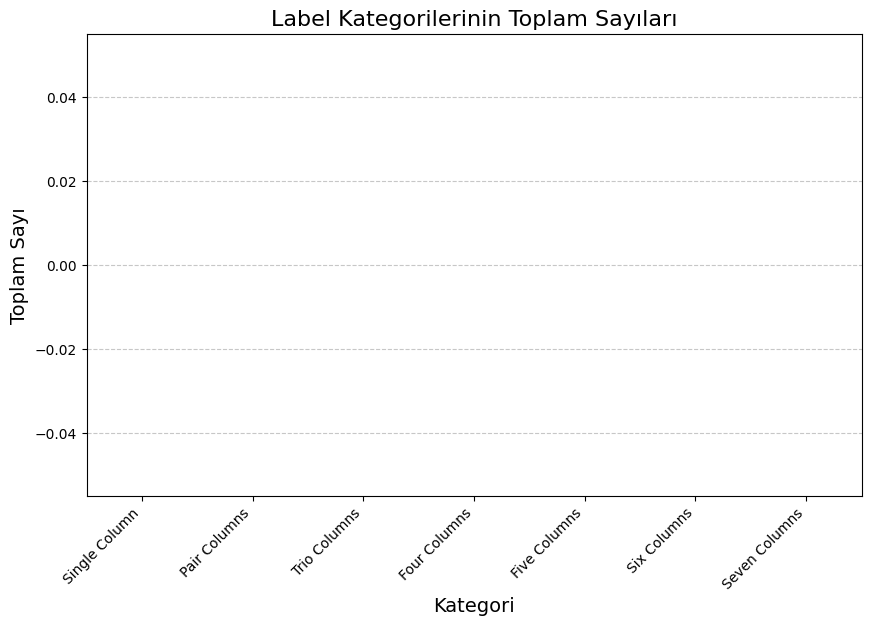

In [96]:
# Belirli label'lara ait değerlerin toplamını hesaplamak için işlev
def count_total_for_labels(df, label_list):
    # Veri çerçevesinde her bir label için kaç kez bulunduğunu say
    return df['label'].isin(label_list).sum()

# Her bir kategori için toplamları hesaplayın
total_counts = {
    'Single Column': count_total_for_labels(df, single_column_labels),
    'Pair Columns': count_total_for_labels(df, pair_column_labels),
    'Trio Columns': count_total_for_labels(df, trio_column_labels),
    'Four Columns': count_total_for_labels(df, four_column_labels),
    'Five Columns': count_total_for_labels(df, five_column_labels),
    'Six Columns': count_total_for_labels(df, six_column_labels),
    'Seven Columns': count_total_for_labels(df, seven_column_labels)
}

# Sonuçları DataFrame'e dönüştür
total_counts_df = pd.DataFrame(list(total_counts.items()), columns=['Category', 'Total Count'])

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Count', data=total_counts_df, palette='viridis')

# Grafik başlıkları ve etiketleri
plt.title('Label Kategorilerinin Toplam Sayıları', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Toplam Sayı', fontsize=14)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndür
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği göster
plt.show()